In [113]:
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [114]:
#Reading the data
Customer = pd.read_csv('Customer.csv')
Transactions = pd.read_csv('Transactions.csv')
prod_cat_info = pd.read_csv('prod_cat_info.csv')

In [115]:
#1)Merging the datasets
sample = pd.merge(Transactions,Customer,how='left',left_on = 'cust_id',right_on = 'customer_Id')
Customer_Final = pd.merge(sample,prod_cat_info,how='left',left_on = 'prod_cat_code'
                          ,right_on = 'prod_cat_code')
Customer_Final.drop('customer_Id',axis = 1,inplace = True)

In [116]:
#2a)
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 16 columns):
transaction_id       99293 non-null int64
cust_id              99293 non-null int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null int64
prod_cat_code        99293 non-null int64
Qty                  99293 non-null int64
Rate                 99293 non-null int64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
DOB                  99293 non-null object
Gender               99253 non-null object
city_code            99257 non-null float64
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null int64
prod_subcat          99293 non-null object
dtypes: float64(3), int64(7), object(6)
memory usage: 12.9+ MB


In [117]:
#2b)
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,3,Kids
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,4,Mobiles
4,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,5,Computers
5,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,8,Personal Appliances
6,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,9,Cameras
7,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,10,Audio and video
8,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,7,Fiction
9,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,12,Academic


In [118]:
#2b)
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,10,Non-Fiction
99284,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,11,Children
99285,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,3,Comics
99286,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,6,DIY
99287,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,7,Fiction
99288,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,12,Academic
99289,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,10,Non-Fiction
99290,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,11,Children
99291,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,3,Comics
99292,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,6,DIY


In [119]:
#2C)
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code,prod_sub_cat_code
count,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99257.000000,99293.000000
mean,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,5.467221,6.806985
std,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,2.859343,3.615952
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000
25%,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,3.000000,4.000000
50%,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,5.000000,7.000000
75%,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000,12.000000


In [120]:
#2d)Frequency table for categorical variables
fb_store_type = Customer_Final.groupby(by = 'Store_type')[['Store_type']].count()
fb_store_type.columns = ['count_of_store_type']
fb_store_type = fb_store_type.reset_index()

In [121]:
fb_gender = Customer_Final.groupby(by = 'Gender')[['Gender']].count()
fb_gender.columns = ['count_of_gender']
fb_gender = fb_gender.reset_index()

In [122]:
fb_prod_cat = Customer_Final.groupby(by = 'prod_cat')[['prod_cat']].count()
fb_prod_cat.columns = ['count_of_prod_cat']
fb_prod_cat = fb_prod_cat.reset_index()

In [123]:
fb_prod_subcat = Customer_Final.groupby(by = 'prod_subcat')[['prod_subcat']].count().head()
fb_prod_subcat.columns = ['count_of_prod_subcat']
fb_prod_subcat = fb_prod_subcat.reset_index()

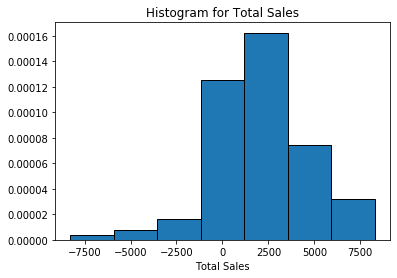

In [124]:
#Histogram for continuous vars
plt.hist(Customer_Final.total_amt,bins=7,edgecolor="black",density=True)
plt.xlabel("Total Sales")
plt.title("Histogram for Total Sales")
plt.show()

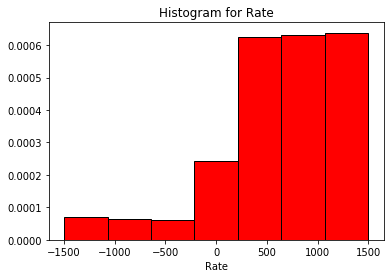

In [125]:
#Histogram for continuous vars
plt.hist(Customer_Final.Rate,bins=7,color = 'Red',edgecolor="black",density=True)
plt.xlabel("Rate")
plt.title("Histogram for Rate")
plt.show()

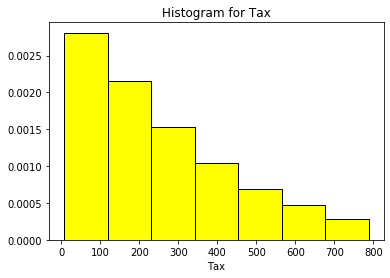

In [126]:
#Histogram for continuous vars
plt.hist(Customer_Final.Tax,bins=7,color = 'yellow',edgecolor="black",density=True)
plt.xlabel("Tax")
plt.title("Histogram for Tax")
plt.show()

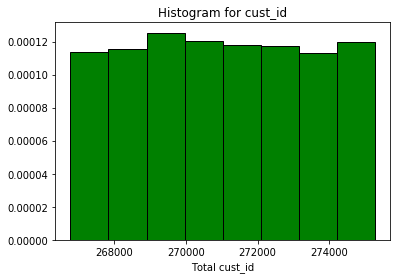

In [127]:
#Histogram for continuous vars
plt.hist(Customer_Final.cust_id,bins=8,color = 'green',edgecolor="black",density=True)
plt.xlabel("Total cust_id")
plt.title("Histogram for cust_id")
plt.show()

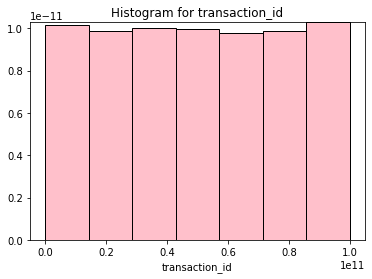

In [128]:
#Histogram for continuous vars
plt.hist(Customer_Final.transaction_id,bins=7,color = 'pink',edgecolor="black",density=True)
plt.xlabel("transaction_id")
plt.title("Histogram for transaction_id")
plt.show()

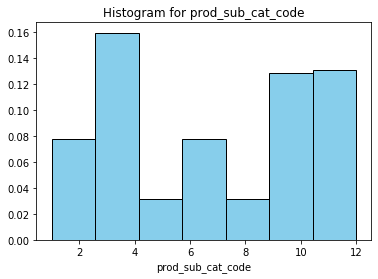

In [129]:
#Histogram for continuous vars
plt.hist(Customer_Final.prod_sub_cat_code,bins=7,color = 'skyblue',edgecolor="black",density=True)
plt.xlabel("prod_sub_cat_code")
plt.title("Histogram for prod_sub_cat_code")
plt.show()

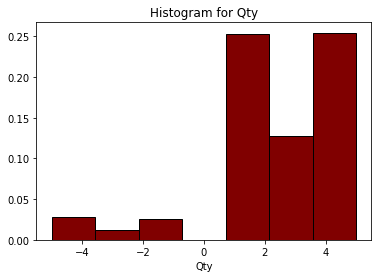

In [130]:
#Histogram for continuous vars
plt.hist(Customer_Final.Qty,bins=7,color = 'maroon',edgecolor="black",density=True)
plt.xlabel("Qty")
plt.title("Histogram for Qty")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


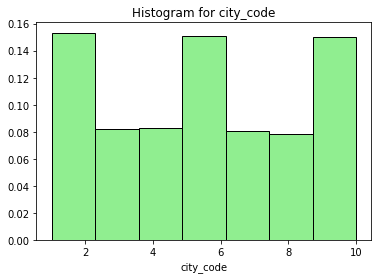

In [131]:
#Histogram for continuous vars
plt.hist(Customer_Final.city_code,bins=7,color = 'lightgreen',edgecolor="black",density=True)
plt.xlabel("city_code")
plt.title("Histogram for city_code")
plt.show()

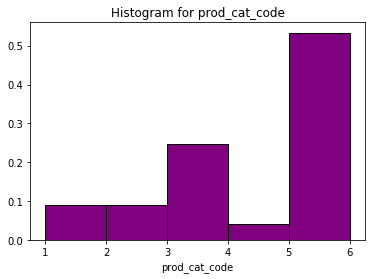

In [132]:
#Histogram for continuous vars
plt.hist(Customer_Final.prod_cat_code,bins=5,color = 'purple',edgecolor="black",density=True)
plt.xlabel("prod_cat_code")
plt.title("Histogram for prod_cat_code")
plt.show()

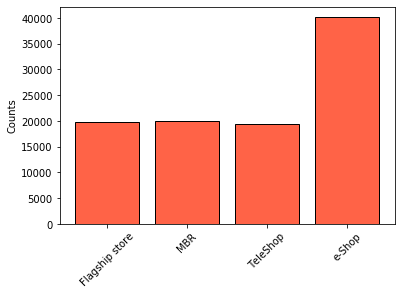

In [133]:
#frequency bars for categorical variables
plt.bar(x = fb_store_type.Store_type,
        height = fb_store_type.count_of_store_type,
        color="tomato",                               
        edgecolor="black")                             
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

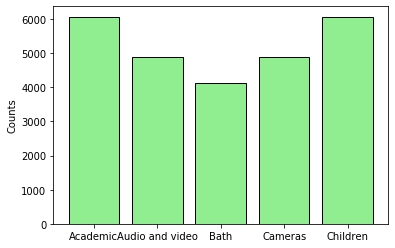

In [134]:
#frequency bars for categorical variables
plt.bar(x = fb_prod_subcat.prod_subcat,
        height = fb_prod_subcat.count_of_prod_subcat,
        color="lightgreen",                               
        edgecolor="black")                             
plt.ylabel("Counts")
plt.show()

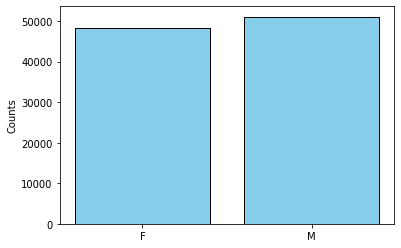

In [135]:
#frequency bars for categorical variables
plt.bar(x = fb_gender.Gender,
        height = fb_gender.count_of_gender,
        color="skyblue",                               
        edgecolor="black")                             
plt.ylabel("Counts")
plt.show()

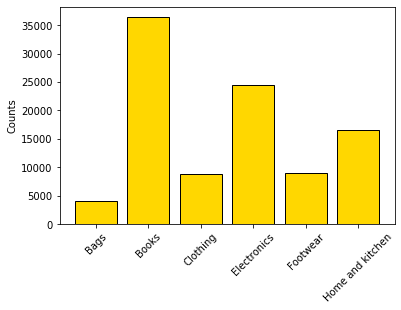

In [136]:
#frequency bars for categorical variables
plt.bar(x = fb_prod_cat.prod_cat,
        height = fb_prod_cat.count_of_prod_cat,
        color="gold",                               
        edgecolor="black")                             
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

In [137]:
#4a)calculate time period of merged dataset
Customer_Final['tran_date'] = Customer_Final['tran_date'].astype('datetime64[ns]')
Customer_Final['DOB'] = Customer_Final['DOB'].astype('datetime64[ns]')

In [138]:
start_date = Customer_Final['tran_date'].min()
end_date = Customer_Final['tran_date'].max()

In [139]:
time_period = end_date - start_date
print(time_period)

1430 days 00:00:00


In [140]:
#4b)count of transactions where total amount is negative
ts = Customer_Final.total_amt
q4 = Customer_Final.loc[(ts < 0 ),['total_amt','transaction_id']]
q4 = q4.round()
q4 = q4.groupby(by = ['transaction_id'])[['transaction_id']].count().add_prefix("Count_of_")

In [141]:
#5)Which product category is famous among males and females
ts = Customer_Final.Gender
q5 = Customer_Final.loc[(ts == "M"),['Gender','prod_cat']]
q5 = q5.groupby(by = ['prod_cat'])[['prod_cat']].count().add_prefix("Count_of_")
q5 = q5.reset_index()
q5

,prod_cat,Count_of_prod_cat
0,Bags,2008
1,Books,18696
2,Clothing,4554
3,Electronics,12850
4,Footwear,4407
5,Home and kitchen,8536


In [142]:
ts = Customer_Final.Gender
q5_b = Customer_Final.loc[(ts == "F"),['Gender','prod_cat']]
q5_b = q5_b.groupby(by = ['prod_cat'])[['prod_cat']].count().add_prefix("Count_of_")
q5_b = q5_b.reset_index()
q5_b
#Books is the product category which is famous among males and females

,prod_cat,Count_of_prod_cat
0,Bags,1988
1,Books,17694
2,Clothing,4317
3,Electronics,11640
4,Footwear,4587
5,Home and kitchen,7976


In [143]:
#6)Which city code has the maximum no of customers
q6 = Customer_Final.groupby(by = ['city_code'])[['city_code']].count().add_prefix("Count_of_")
q6 = q6.reset_index()
q6['%_of_customers'] = (q6['Count_of_city_code']/q6['Count_of_city_code'].sum())*100
q6
#City code 4 has the maximum no of customers accounting to 10.65%

,city_code,Count_of_city_code,%_of_customers
0,1.0,9717,9.789738
1,2.0,9843,9.916681
2,3.0,10467,10.545352
3,4.0,10571,10.650130
4,5.0,10116,10.191725
5,6.0,9130,9.198344
6,7.0,10258,10.334787
7,8.0,9965,10.039594
8,9.0,9214,9.282972
9,10.0,9976,10.050677


In [144]:
#7)Which store type has the maximum sales by value and quantity
q7 = Customer_Final.groupby(by = ['Store_type'])[['Store_type']].count().add_prefix("Count_of_")
q7_b = Customer_Final.groupby(by = ['Store_type'])[['total_amt']].sum().add_prefix("Sum_of_")
q7_b = q7_b.round()
q7_b['Count_of_sales'] = q7['Count_of_Store_type']
q7_b = q7_b.reset_index()
#Flagship store has the highest total amount for sales and MBR has highest sales count
q7_b

,Store_type,Sum_of_total_amt,Count_of_sales
0,Flagship store,41883973.0,19814
1,MBR,41700330.0,19974
2,TeleShop,40466557.0,19320
3,e-Shop,85915748.0,40185


In [145]:
#8)Total sales where store type is flagship stores and product category is clothing and electronics
ts = Customer_Final.Store_type
ts1 = Customer_Final.prod_cat
q8 = Customer_Final.loc[(ts1 == "Electronics")|(ts1 == "Clothing"),['Store_type','prod_cat','total_amt']]
q8_b = q8.loc[(ts == "Flagship store"),['Store_type','prod_cat','total_amt']].reset_index()
q8_c = q8_b.groupby(by = ['prod_cat'])[['total_amt']].sum().add_prefix("Sum_of_")
q8_c = q8_c.round().reset_index()
q8_c

,prod_cat,Sum_of_total_amt
0,Clothing,3583270.0
1,Electronics,11075680.0


In [146]:
#9)Total sales where product category is lectronics and gender is male
ts = Customer_Final.Gender
ts1 = Customer_Final.prod_cat
q9 = Customer_Final.loc[(ts1 == "Electronics")&(ts == "M"),['Gender','prod_cat','total_amt']]
q9_b = q9.groupby(by = ['prod_cat','Gender'])[['total_amt']].sum().add_prefix("Sum_of_")
q9_b = q9_b.round()
q9_b

,,Sum_of_total_amt
prod_cat,Gender,
Electronics,M,28515547.0


In [147]:
#10)Count of transactions where count of transaction is more than 10
ts = Customer_Final.total_amt
q10 = Customer_Final.loc[(ts >= 0),['transaction_id','total_amt']]
q10['total_amt'] = q10['total_amt'].round()
q10_b = q10.groupby(by = ['transaction_id'])[['transaction_id']].count().add_prefix("Count_of_")
q10_b = q10_b.reset_index()
q10_c = q10_b['Count_of_transaction_id'] > 10
#no customer has more than 10 transactions

In [148]:
#q11)Age calculation
now = pd.Timestamp('now')
Customer_Final['Age'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [149]:
#q11a)Total amount spent on electronics and books product category
ts = Customer_Final.Age
ts1 = Customer_Final.prod_cat
q11 = Customer_Final.loc[(ts >= 25)&(ts <= 35),['Age','total_amt','prod_cat','tran_date']]
q11_b = q11.loc[(ts1 == 'Electronics')|(ts1 == 'Books'),['Age','total_amt','prod_cat','tran_date']]
q11_c = q11_b.groupby(by = ['Age','prod_cat'])[['total_amt']].sum().add_prefix("Sum_of_")
q11_c = q11_c.round().reset_index()
q11_c.head()

,Age,prod_cat,Sum_of_total_amt
0,27.0,Books,3376878.0
1,27.0,Electronics,2220243.0
2,28.0,Books,3103278.0
3,28.0,Electronics,1939988.0
4,29.0,Books,2589738.0


In [150]:
#q11b)Total amount spent by these customers between 1st jan 2014 to 1st march 2014
#Extracting year,month and date
Customer_Final['Year'] = Customer_Final['tran_date'].dt.year
Customer_Final['Month'] = Customer_Final['tran_date'].dt.month
Customer_Final['Day'] = Customer_Final['tran_date'].dt.day

In [151]:
ts = Customer_Final.Year
ts1 = Customer_Final.Month
ts2 = Customer_Final.Day
ts3 = q12.Age
q12 = Customer_Final.loc[(ts >= 2014)&(ts1 >= 1)&(ts2 >= 1),['tran_date','cust_id','prod_cat','total_amt','Age']]
q12_1 = q12.loc[(ts3 >= 25)&(ts3 <= 35),['tran_date','cust_id','prod_cat','total_amt','Age']]
q12_b = q12_1.groupby(by = ['cust_id','prod_cat','Age'])[['total_amt']].sum().add_prefix("Sum_of_")
q12_b  =q12_b.round()
q12_b.head()

Sum_of_total_amt
cust_id prod_cat         Age                   
266813  Home and kitchen 31.0            4150.0
266841  Books            28.0           15892.0
        Clothing         28.0           15143.0
266843  Home and kitchen 32.0           20641.0
266853  Clothing         29.0            7638.0